Steps
1. Preprocess + EDA + Feature Selection
2. Extract input and output cols
3. Scale the values
4. Train Test Split
5. Train the model
6. Evaluate the model/model selection
7. Deploy the model

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("/content/placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [9]:
import matplotlib.pyplot as plt


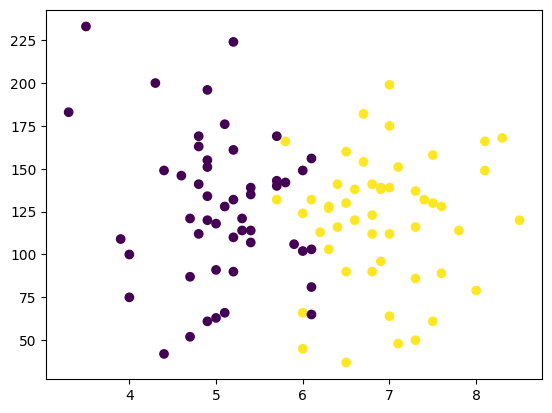

In [11]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])
#yellow - done/yes

In [12]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [13]:
x #2D Tensor

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [14]:
y #1D tensor

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)

In [16]:
x_train

,cgpa,iq
83,7.5,130.0
74,6.7,154.0
19,5.2,132.0
48,6.6,138.0
96,4.4,42.0
...,...,...
91,7.5,158.0
70,6.3,127.0
14,6.1,103.0
87,5.7,132.0


In [17]:
y_train

83    1
74    1
19    0
48    1
96    0
     ..
91    1
70    1
14    0
87    1
7     0
Name: placement, Length: 90, dtype: int64

In [18]:
x_test

,cgpa,iq
12,5.4,139.0
40,4.9,134.0
73,4.9,61.0
45,6.0,66.0
81,5.4,107.0
88,4.4,149.0
0,6.8,123.0
54,6.4,141.0
58,8.0,79.0
43,6.8,141.0


In [19]:
y_test

12    0
40    0
73    0
45    1
81    0
88    0
0     1
54    1
58    1
43    1
Name: placement, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [21]:
x_train

array([[ 1.30709384e+00,  1.32622757e-01],
       [ 6.09460359e-01,  7.26948805e-01],
       [-6.98602415e-01,  1.82149928e-01],
       [ 5.22256174e-01,  3.30731440e-01],
       [-1.39623589e+00, -2.04657275e+00],
       [-1.22182753e+00,  5.28840123e-01],
       [ 8.62352496e-02,  1.82149928e-01],
       [ 1.39429802e+00, -8.82684242e-01],
       [-2.18107356e+00,  2.68327205e+00],
       [ 3.47847805e-01, -2.14067438e-01],
       [ 8.71072914e-01, -1.50177388e+00],
       [ 9.58277099e-01,  6.52658049e-01],
       [ 7.83868729e-01,  3.30731440e-01],
       [ 4.35051989e-01, -8.57920657e-01],
       [ 1.30709384e+00, -1.57606463e+00],
       [-8.73010785e-01, -1.64540267e-01],
       [-9.60214970e-01,  6.52658049e-01],
       [ 5.22256174e-01, -1.15013096e-01],
       [-1.74505263e+00, -6.10284803e-01],
       [-9.60214970e-01,  1.76701939e+00],
       [-9.60214970e-01,  7.51712391e-01],
       [ 4.35051989e-01,  1.32622757e-01],
       [-5.24194045e-01,  2.56440684e-01],
       [ 1.

In [22]:
x_test = scaler.transform(x_test)

In [23]:
x_test

array([[-5.24194045e-01,  3.55495025e-01],
       [-9.60214970e-01,  2.31677098e-01],
       [-9.60214970e-01, -1.57606463e+00],
       [-9.68935389e-04, -1.45224671e+00],
       [-5.24194045e-01, -4.36939706e-01],
       [-1.39623589e+00,  6.03130879e-01],
       [ 6.96664544e-01, -4.07223403e-02],
       [ 3.47847805e-01,  4.05022196e-01],
       [ 1.74311476e+00, -1.13032010e+00],
       [ 6.96664544e-01,  4.05022196e-01]])

In [24]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [25]:
clf.fit(x_train, y_train)

LogisticRegression()

In [26]:
prediction = clf.predict(x_test)
prediction

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1])

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)*100
accuracy

90.0

<Axes: >

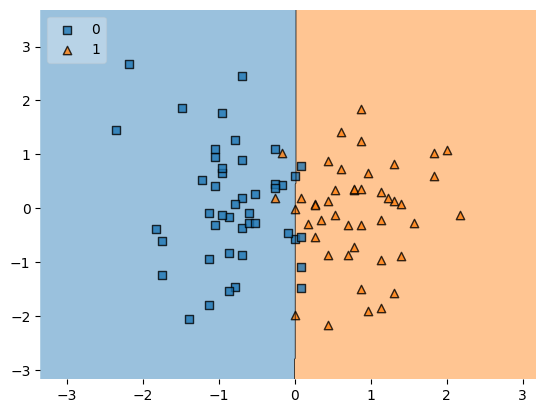

In [29]:
#Visualize model
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [30]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))